In [2]:
import numpy as np
from src.utils.utils import *
import matplotlib.pyplot as plt

/opt/anaconda3/envs/dpmol/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")


In [3]:
data_engs = np.load("data/conditionalMADE-data/100-10mus/train_10mus-engs.npy")[:, 0]

In [4]:
neigh, coup, len_neigh = get_couplings(10, "data/couplings/100.txt")
samples = np.load("sample-100000_size-101_2023-11-01_21-42-54.npz")
samples = samples["sample"]

engs = []
for sample in samples:
    engs.append(compute_energy(sample.flatten(), neigh, coup, len_neigh)/100)

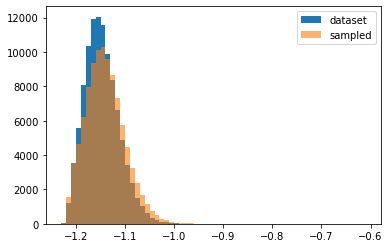

In [5]:
binss = np.arange(-1.23, -0.6, 0.01)
plt.hist(data_engs, bins=binss, label="dataset")
plt.hist(engs, bins=binss, label="sampled", alpha=.6)
# plt.yscale("log")
plt.legend()
plt.show()

In [6]:
# print((np.std(data_engs) + 1)/2)
# print((np.mean(data_engs) + 1)/2)

# print(np.std(data_engs))
# print(np.mean(data_engs))

data_engs = (data_engs + 1) / 2
print(f"engs mean: {data_engs.mean()}")
print(f"engs std: {data_engs.std()}")
data_engs *= 2 - 1

engs mean: -0.07374759300876936
engs std: 0.0173661379676595
